In [53]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


diabetes = load_diabetes()


df_X = diabetes.data
df_y = diabetes.target

df_X = np.array(df_X)
df_y = np.array(df_y)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,test_size =0.2 ,random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

W = np.random.rand(10)
b = np.random.rand()

print(df_X.shape)
print(df_y.shape)

(353, 10) (353,)
(89, 10) (89,)
(442, 10)
(442,)


In [54]:
W

array([0.14908934, 0.04058844, 0.80853507, 0.08822339, 0.72440136,
       0.52874071, 0.57397647, 0.01867757, 0.66830586, 0.82686165])

In [55]:
def model (df_X, W, b):
    predictions =0
    for i in range(10):
        predictions += df_X[:,i] * W[i]
    predictions += b
    return predictions

def MSE (a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(df_X,W,b,df_y):
    predictions = model(df_X,W,b)
    L = MSE(predictions, df_y)
    return L

def gradient(df_X,W,b,df_y):
    N = len(W)
    y_pred = model(df_X,W,b)
    dW = 1/N*2*df_X.T.dot(y_pred - df_y)
    db = 2*(y_pred-df_y).mean()
    return dW,db

dW, db = gradient(df_X,W,b,df_y)
print(dW)
print(db)

[ -60.63045514  -13.87888898 -189.56497893 -142.70243249  -68.2277732
  -55.99753801  127.7614565  -139.07750182 -182.86395459 -123.48859587]
-303.4765437934239


In [58]:
LEARNING_RATE = 0.01

losses = []

for i in range(1,1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X,W,b,df_y)
    losses.append(L)
    if i%10 ==0:
        print('Iteration %d : Loss %0.4F'%(i,L))

Iteration 10 : Loss 4342.4228
Iteration 20 : Loss 4175.6862
Iteration 30 : Loss 4046.3301
Iteration 40 : Loss 3943.3499
Iteration 50 : Loss 3859.2702
Iteration 60 : Loss 3788.9822
Iteration 70 : Loss 3728.9669
Iteration 80 : Loss 3676.7766
Iteration 90 : Loss 3630.6879
Iteration 100 : Loss 3589.4696
Iteration 110 : Loss 3552.2265
Iteration 120 : Loss 3518.2955
Iteration 130 : Loss 3487.1747
Iteration 140 : Loss 3458.4756
Iteration 150 : Loss 3431.8912
Iteration 160 : Loss 3407.1736
Iteration 170 : Loss 3384.1186
Iteration 180 : Loss 3362.5551
Iteration 190 : Loss 3342.3377
Iteration 200 : Loss 3323.3413
Iteration 210 : Loss 3305.4571
Iteration 220 : Loss 3288.5896
Iteration 230 : Loss 3272.6546
Iteration 240 : Loss 3257.5772
Iteration 250 : Loss 3243.2906
Iteration 260 : Loss 3229.7352
Iteration 270 : Loss 3216.8573
Iteration 280 : Loss 3204.6084
Iteration 290 : Loss 3192.9451
Iteration 300 : Loss 3181.8276
Iteration 310 : Loss 3171.2201
Iteration 320 : Loss 3161.0901
Iteration 330 : L

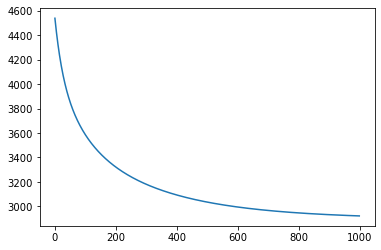

In [59]:
plt.plot(losses)
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [61]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

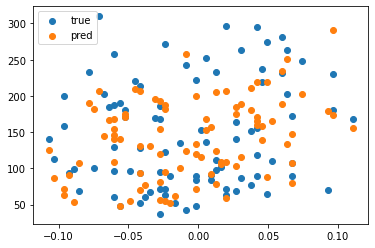

In [62]:
plt.scatter(X_test[:,0],y_test, label = "true")
plt.scatter(X_test[:,0], predictions, label = "pred")
plt.legend()
plt.show()